## Analyze carbon source data

This notebook analyzes the carbon source data collected on 07.18.2017

In [1]:
#Import packages
import numpy as np 
import os
os.environ["THEANO_FLAGS"] = "device=gpu1"

import tifffile as tiff
from skimage.io import imread
from skimage.measure import label, regionprops
import scipy
import matplotlib.pyplot as plt
import cPickle as pickle
from SLIP_functions import analyze_well, analyze_plate, segment_SLIP, plot_slip_well, plot_slip_wells_gmm, plot_slip_wells_lysis_posterior, plot_slip_wells_MOI_posterior
from SLIP_functions import plot_slip_joint_plot, fit_kde, compute_p_values, classify_infections_gmm
from keio_names import get_keio_names, pos_to_strain

import seaborn as sns
import pandas as pd

sns.set_context('notebook', font_scale = 1.1)
sns.set_style('white')
sns.set_style('ticks')

#Activate matplotlib inline
%matplotlib inline

#Define root directory path
root_direc = '/media/vanvalen/fe0ceb60-f921-4184-a484-b7de12c1eea6/keio_screen/07.18.2017/carbon_source/'

#Define directory path to infection data (all positions)
data_direc = os.path.join(root_direc, 'data')

#Define directory path to control data (all positions)
control_direc = os.path.join(root_direc, 'data')

#Define directory path to where you want to store neural net outputs. 
#mask directories must exist at run time!
mask_direc = os.path.join(root_direc, 'masks')
control_mask_direc = os.path.join(root_direc,'control_masks')

tifffile.py:156: UserWarning: failed to import the optional _tifffile C extension module.
Loading of some compressed images will be slow.
Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "failed to import the optional _tifffile C extension module.\n"
Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 1: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [2]:
#Define which wells were used
row_control = ['A']
row_data = ['B','C','D','E','G']
col_control = [1,2,3,4,5,6,7,8,9,10,11,12]
col_data = [1,2,3,4,5,6,7,8,9,10,11,12]

In [4]:
#Segment the control wells
segment_SLIP(control_direc, control_mask_direc, alphabet = row_control, columns= col_control)

['A'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Segmenting Position A1


cnn_functions.py:255: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  pooled_array +=[pool_2d(input_image[:, :, offset_x::stride, offset_y::stride], pool_size, stride = (1,1), mode = mode, padding = (0,0), ignore_border = True)]


Segmenting Position A2
Segmenting Position A3
Segmenting Position A4
Segmenting Position A5
Segmenting Position A6
Segmenting Position A7
Segmenting Position A8
Segmenting Position A9
Segmenting Position A10
Segmenting Position A11
Segmenting Position A12


In [5]:
#Segment the infected wells
segment_SLIP(data_direc, mask_direc, alphabet = row_data, columns= col_data)

['B', 'C', 'D', 'E', 'G'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Segmenting Position B1
Segmenting Position B2
Segmenting Position B3
Segmenting Position B4
Segmenting Position B5
Segmenting Position B6
Segmenting Position B7
Segmenting Position B8
Segmenting Position B9
Segmenting Position B10
Segmenting Position B11
Segmenting Position B12
Segmenting Position C1
Segmenting Position C2
Segmenting Position C3
Segmenting Position C4
Segmenting Position C5
Segmenting Position C6
Segmenting Position C7
Segmenting Position C8
Segmenting Position C9
Segmenting Position C10
Segmenting Position C11
Segmenting Position C12
Segmenting Position D1
Segmenting Position D2
Segmenting Position D3
Segmenting Position D4
Segmenting Position D5
Segmenting Position D6
Segmenting Position D7
Segmenting Position D8
Segmenting Position D9
Segmenting Position D10
Segmenting Position D11
Segmenting Position D12
Segmenting Position E1
Segmenting Position E2
Segmenting Position E3
Segmenting Position E4
Segme

In [3]:
# Quantify the data from the control wells
mean_FITC_control, mean_cherry_control = analyze_plate(control_direc, control_mask_direc, pos_list = range(9), row_names = row_control, col_names = col_control)
mean_FITC_control_name = os.path.join(root_direc, 'mean_FITC_control.pkl')
mean_cherry_control_name = os.path.join(root_direc, 'mean_cherry_control.pkl')
pickle.dump(mean_FITC_control, open(mean_FITC_control_name, 'wb'))
pickle.dump(mean_cherry_control, open(mean_cherry_control_name, 'wb'))

Processing well A1
Processing well A2
Processing well A3
Processing well A4
Processing well A5
Processing well A6
Processing well A7
Processing well A8
Processing well A9
Processing well A10
Processing well A11
Processing well A12


In [4]:
# Quantify the data from the infection wells
mean_FITC, mean_cherry = analyze_plate(data_direc, mask_direc, pos_list = range(9), row_names = row_data, col_names = col_data)
mean_FITC_name = os.path.join(root_direc, 'mean_FITC.pkl')
mean_cherry_name = os.path.join(root_direc, 'mean_cherry.pkl')
pickle.dump(mean_FITC, open(mean_FITC_name, 'wb'))
pickle.dump(mean_cherry, open(mean_cherry_name, 'wb'))

Processing well B1
Processing well B2
Processing well B3
Processing well B4
Processing well B5
Processing well B6
Processing well B7
Processing well B8
Processing well B9
Processing well B10
Processing well B11
Processing well B12
Processing well C1
Processing well C2
Processing well C3
Processing well C4
Processing well C5
Processing well C6
Processing well C7
Processing well C8
Processing well C9
Processing well C10
Processing well C11
Processing well C12
Processing well D1
Processing well D2
Processing well D3
Processing well D4
Processing well D5
Processing well D6
Processing well D7
Processing well D8
Processing well D9
Processing well D10
Processing well D11
Processing well D12
Processing well E1
Processing well E2
Processing well E3
Processing well E4
Processing well E5
Processing well E6
Processing well E7
Processing well E8
Processing well E9
Processing well E10
Processing well E11
Processing well E12
Processing well G1
Processing well G2
Processing well G3
Processing well G4


In [3]:
#Load saved data
mean_FITC_name = os.path.join(root_direc, 'mean_FITC.pkl')
mean_cherry_name = os.path.join(root_direc, 'mean_cherry.pkl')
mean_FITC = pickle.load(open(mean_FITC_name, 'rb'))
mean_cherry = pickle.load(open(mean_cherry_name, 'rb'))

mean_FITC_control_name = os.path.join(root_direc, 'mean_FITC_control.pkl')
mean_cherry_control_name = os.path.join(root_direc, 'mean_cherry_control.pkl')
mean_FITC_control = pickle.load(open(mean_FITC_control_name, 'rb'))
mean_cherry_control = pickle.load(open(mean_cherry_control_name, 'rb'))

#Clean the 11th well
temp = mean_FITC_control['A11']
temp2 = mean_cherry_control['A11']

for j in xrange(len(temp)):
    if temp[j] > 300 or temp2[j]>100:
        temp[j] = None
        temp2[j] = None

temp = [x for x in temp if x is not None]
temp2 = [y for y in temp2 if y is not None]

mean_FITC_control['A11'] = temp
mean_cherry_control['A11'] = temp2

/home/vanvalen/.pyenv/versions/2.7.4/envs/DeepCell/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/vanvalen/.pyenv/versions/2.7.4/envs/DeepCell/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


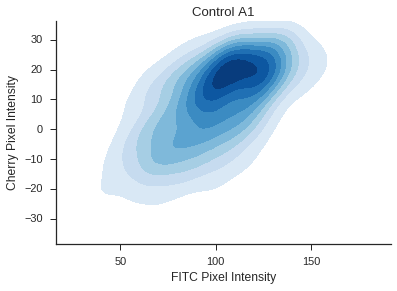

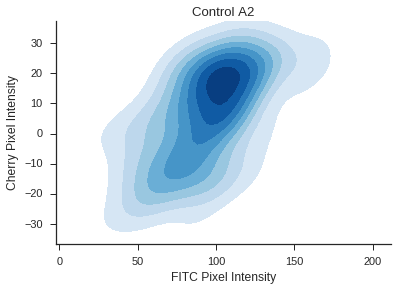

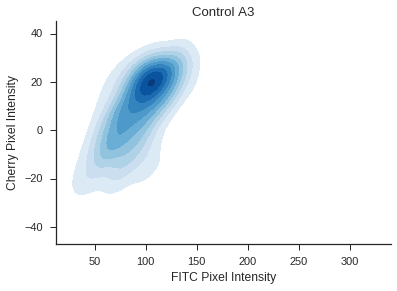

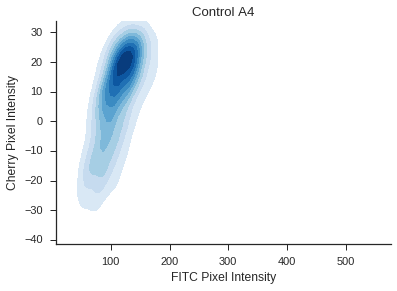

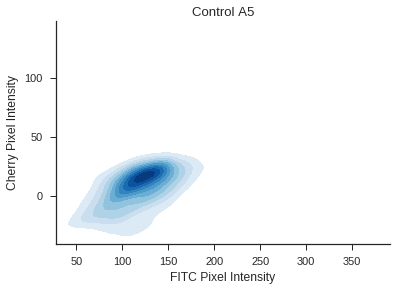

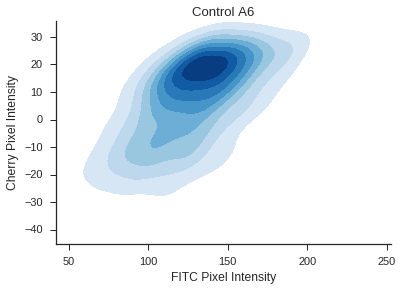

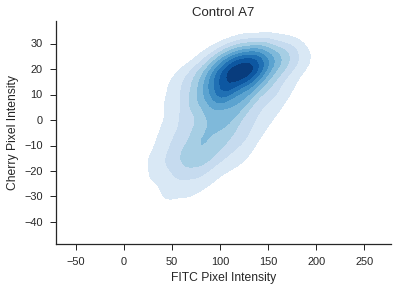

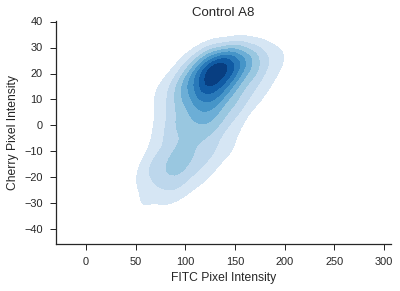

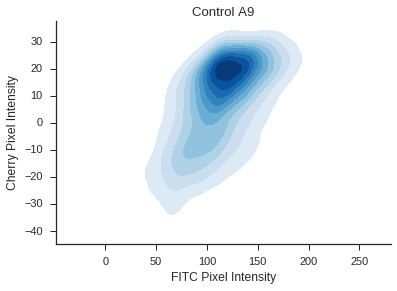

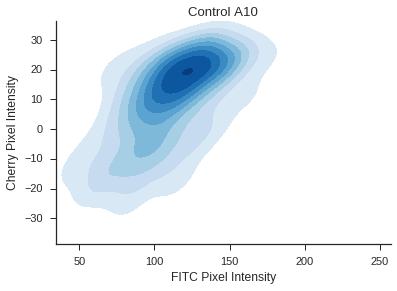

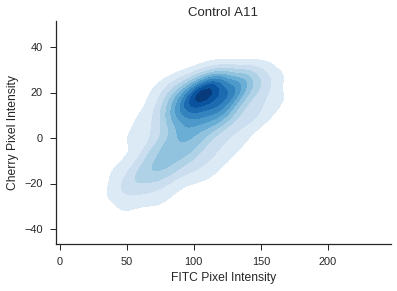

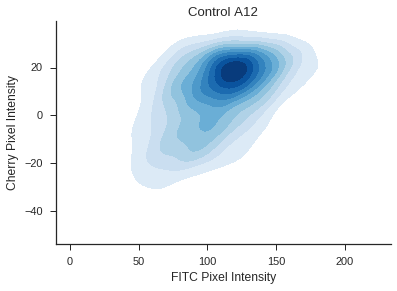

In [4]:
#Plot the data from the control plate
for well in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']:
#     plot_slip_well(mean_FITC_control, mean_cherry_control, well = well, title = 'Control ' + well)
    fig = plt.figure()
    fitc_list = np.array(mean_FITC_control[well])
    cherry_list = np.array(mean_cherry_control[well])
    sns.kdeplot(fitc_list, cherry_list, cmap="Blues", shade=True, shade_lowest=False)
    plt.xlabel('FITC Pixel Intensity')
    plt.ylabel('Cherry Pixel Intensity')
    plt.title('Control ' + well)
    xmax = max(fitc_list)
    xmin = min(fitc_list)
    ymax = max(cherry_list)
    ymin = min(cherry_list)
    plt.axis([xmin, xmax, ymin, ymax])
    sns.despine()



In [5]:
# Define dictionary with conditions
carbon_source = {}
carbon_source['maltose'] = [12, 11, 10]
carbon_source['glycerol'] = [9,8,7]
carbon_source['glucose'] = [6,5,4]
carbon_source['galactose'] = [3,2,1]

phage_added = {}
phage_added['0'] = 'A'
phage_added['0.5'] = 'B'
phage_added['1'] = 'C'
phage_added['5'] = 'D'
phage_added['10'] = 'E'
phage_added['20'] = 'G'

reverse_carbon_source = {}
reverse_carbon_source[1] = 'galactose'
reverse_carbon_source[2] = 'galactose'
reverse_carbon_source[3] = 'galactose'
reverse_carbon_source[4] = 'glucose'
reverse_carbon_source[5] = 'glucose'
reverse_carbon_source[6] = 'glucose'
reverse_carbon_source[7] = 'glycerol'
reverse_carbon_source[8] = 'glycerol'
reverse_carbon_source[9] = 'glycerol'
reverse_carbon_source[10] = 'maltose'
reverse_carbon_source[11] = 'maltose'
reverse_carbon_source[12] = 'maltose'

reverse_phage_added = {}
reverse_phage_added['A'] = 0
reverse_phage_added['B'] = 0.5
reverse_phage_added['C'] = 1
reverse_phage_added['D'] = 5
reverse_phage_added['E'] = 10
reverse_phage_added['G'] = 20


In [9]:
#Print the number of cells in each well
for key in mean_FITC_control.keys():
    print key, len(mean_FITC_control[key])
    
for key in mean_FITC.keys():
    print key, len(mean_FITC[key])

A11 3203
A10 771
A12 3583
A1 737
A3 447
A2 152
A5 827
A4 2415
A7 9020
A6 1482
A9 7168
A8 6268
B8 2319
D10 2021
D11 1515
D12 1895
E11 2007
E10 1686
E12 1624
B12 3062
B10 596
B11 1276
C12 4427
C11 1795
C10 1437
G7 6262
G6 612
G5 1276
G4 1312
G3 563
G2 504
G1 299
G9 5834
G8 4394
C9 576
C8 2628
E9 3271
E8 882
C3 113
C2 330
C1 385
E6 471
E1 679
C6 437
C5 242
C4 161
B2 418
B3 220
E5 541
E4 676
B1 789
G12 2762
G11 1169
G10 2680
D5 441
E7 2484
C7 708
B9 1416
B4 1057
B5 885
B6 437
B7 7771
E3 151
D8 1459
D9 375
D6 312
D7 907
D4 231
E2 155
D2 163
D3 175
D1 363


/home/vanvalen/.pyenv/versions/2.7.4/envs/DeepCell/lib/python2.7/site-packages/openpyxl/reader/worksheet.py:310: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


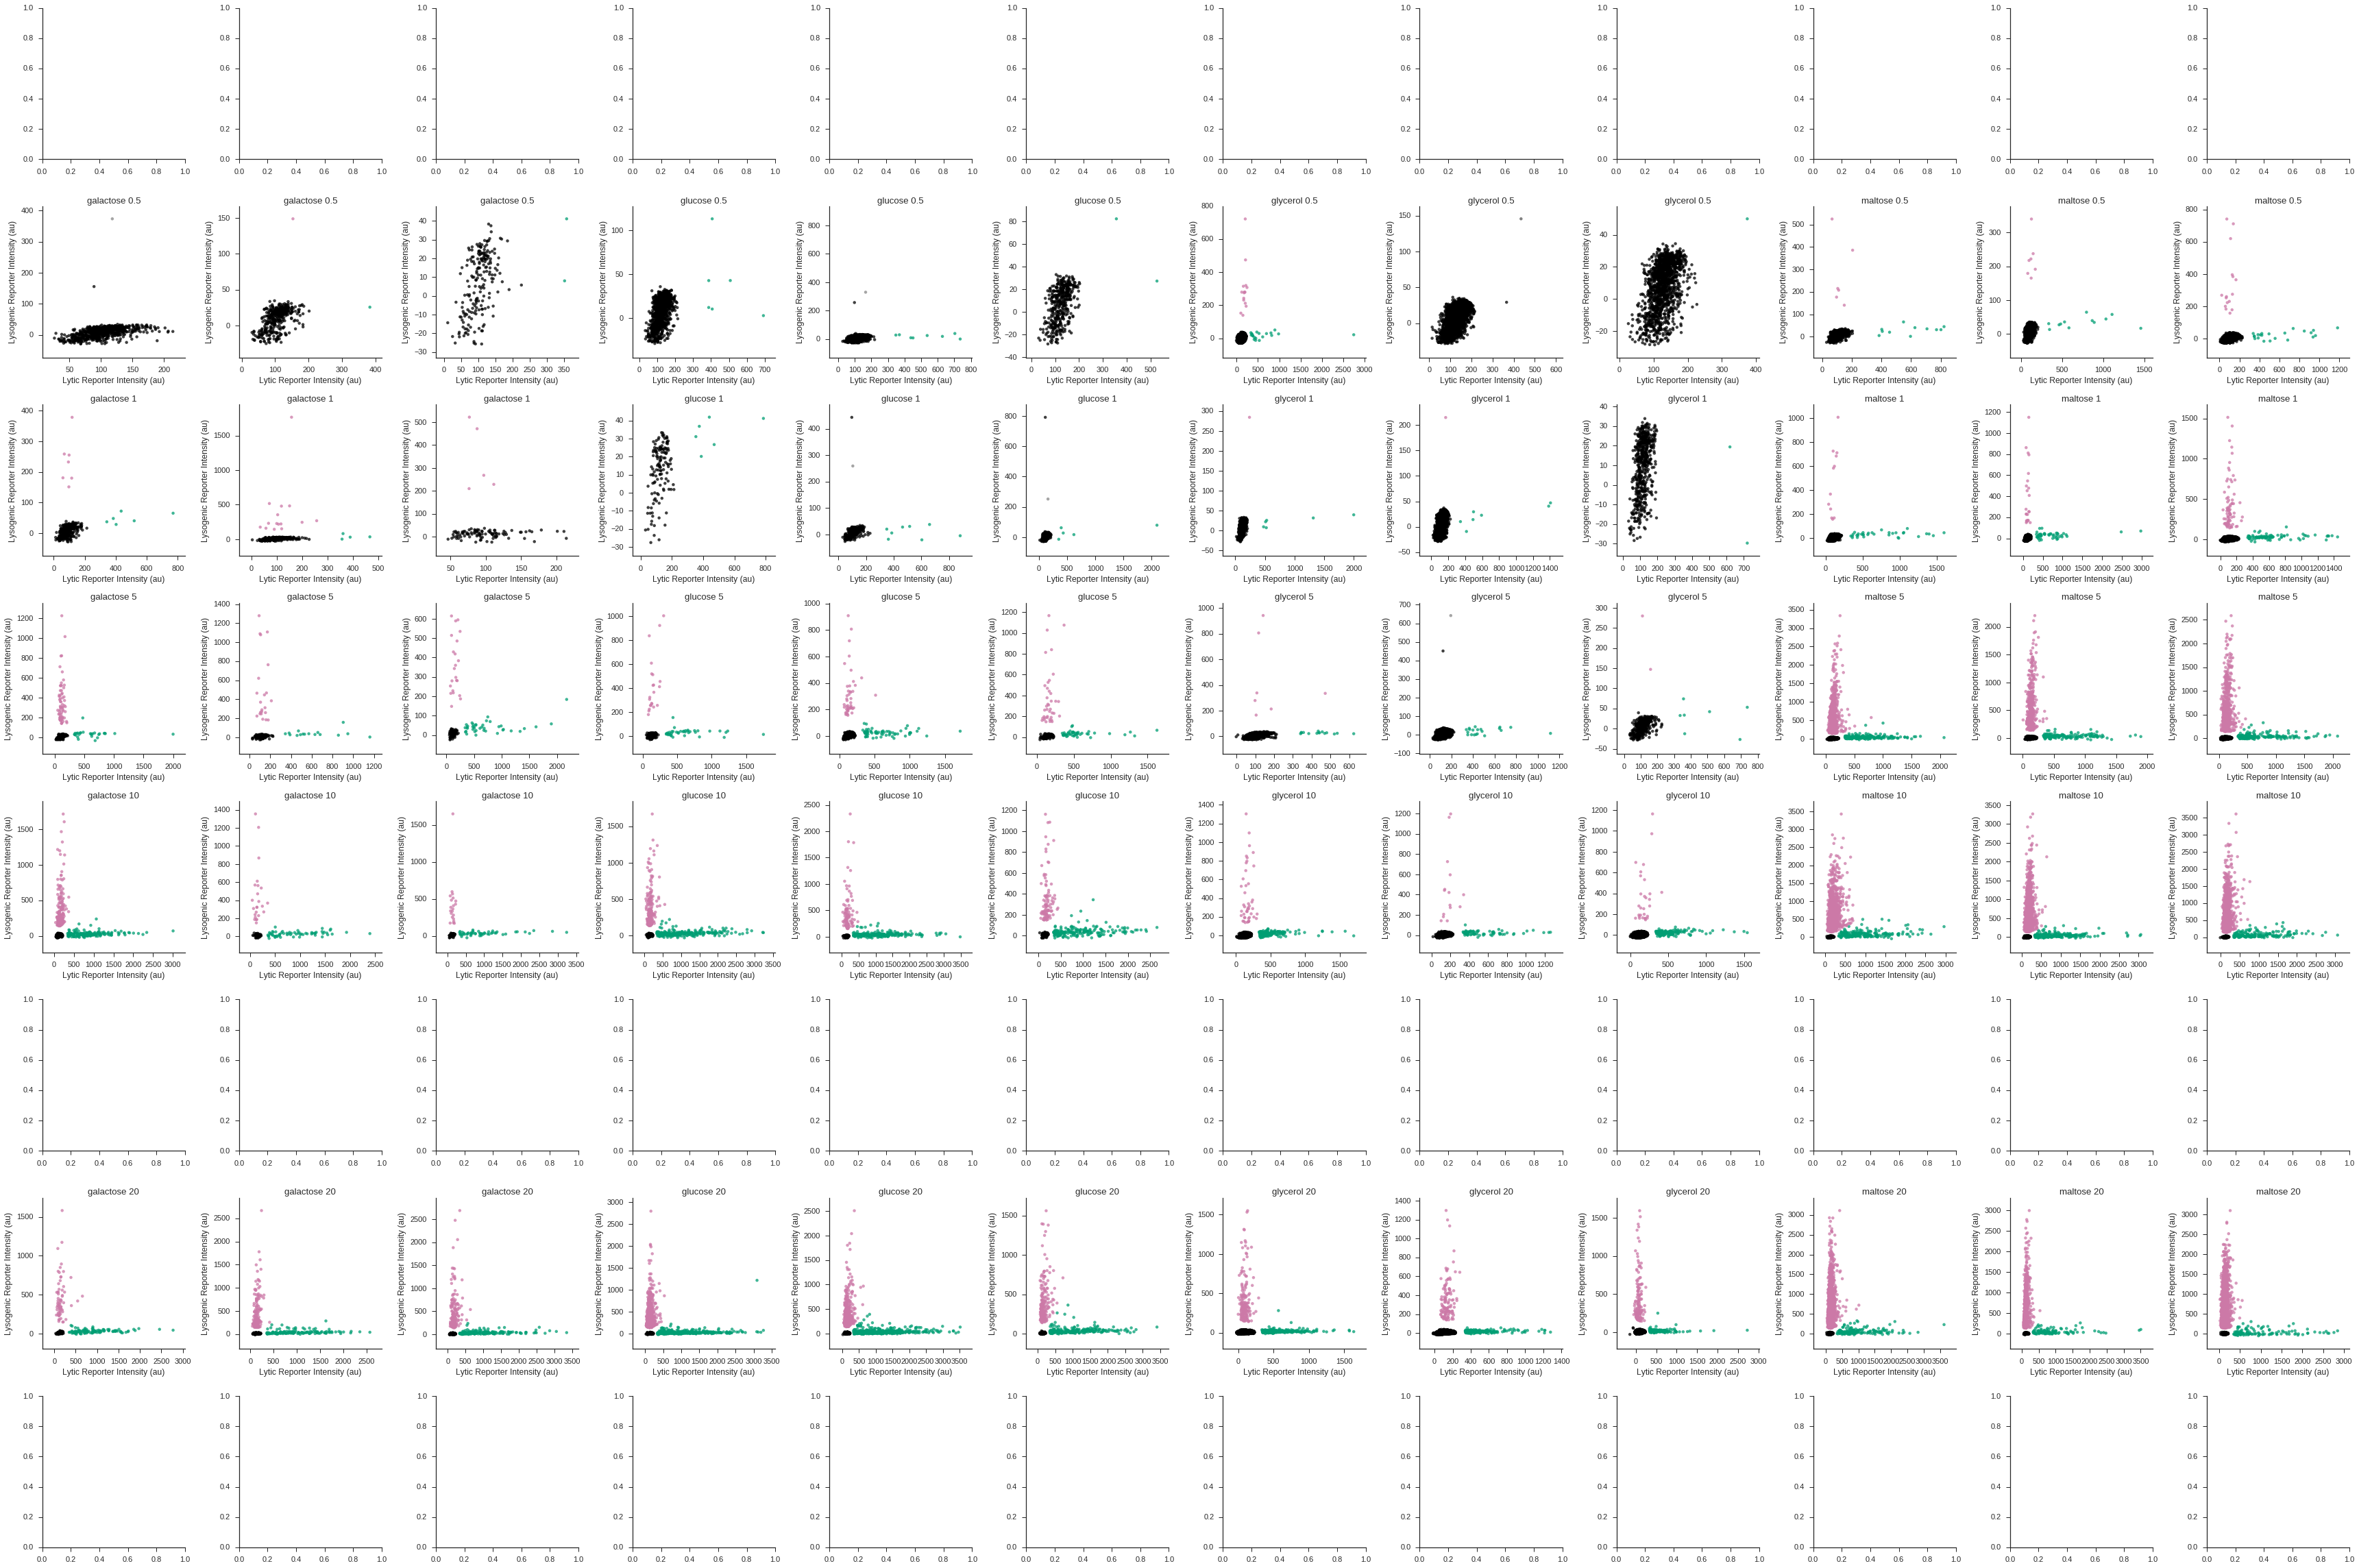

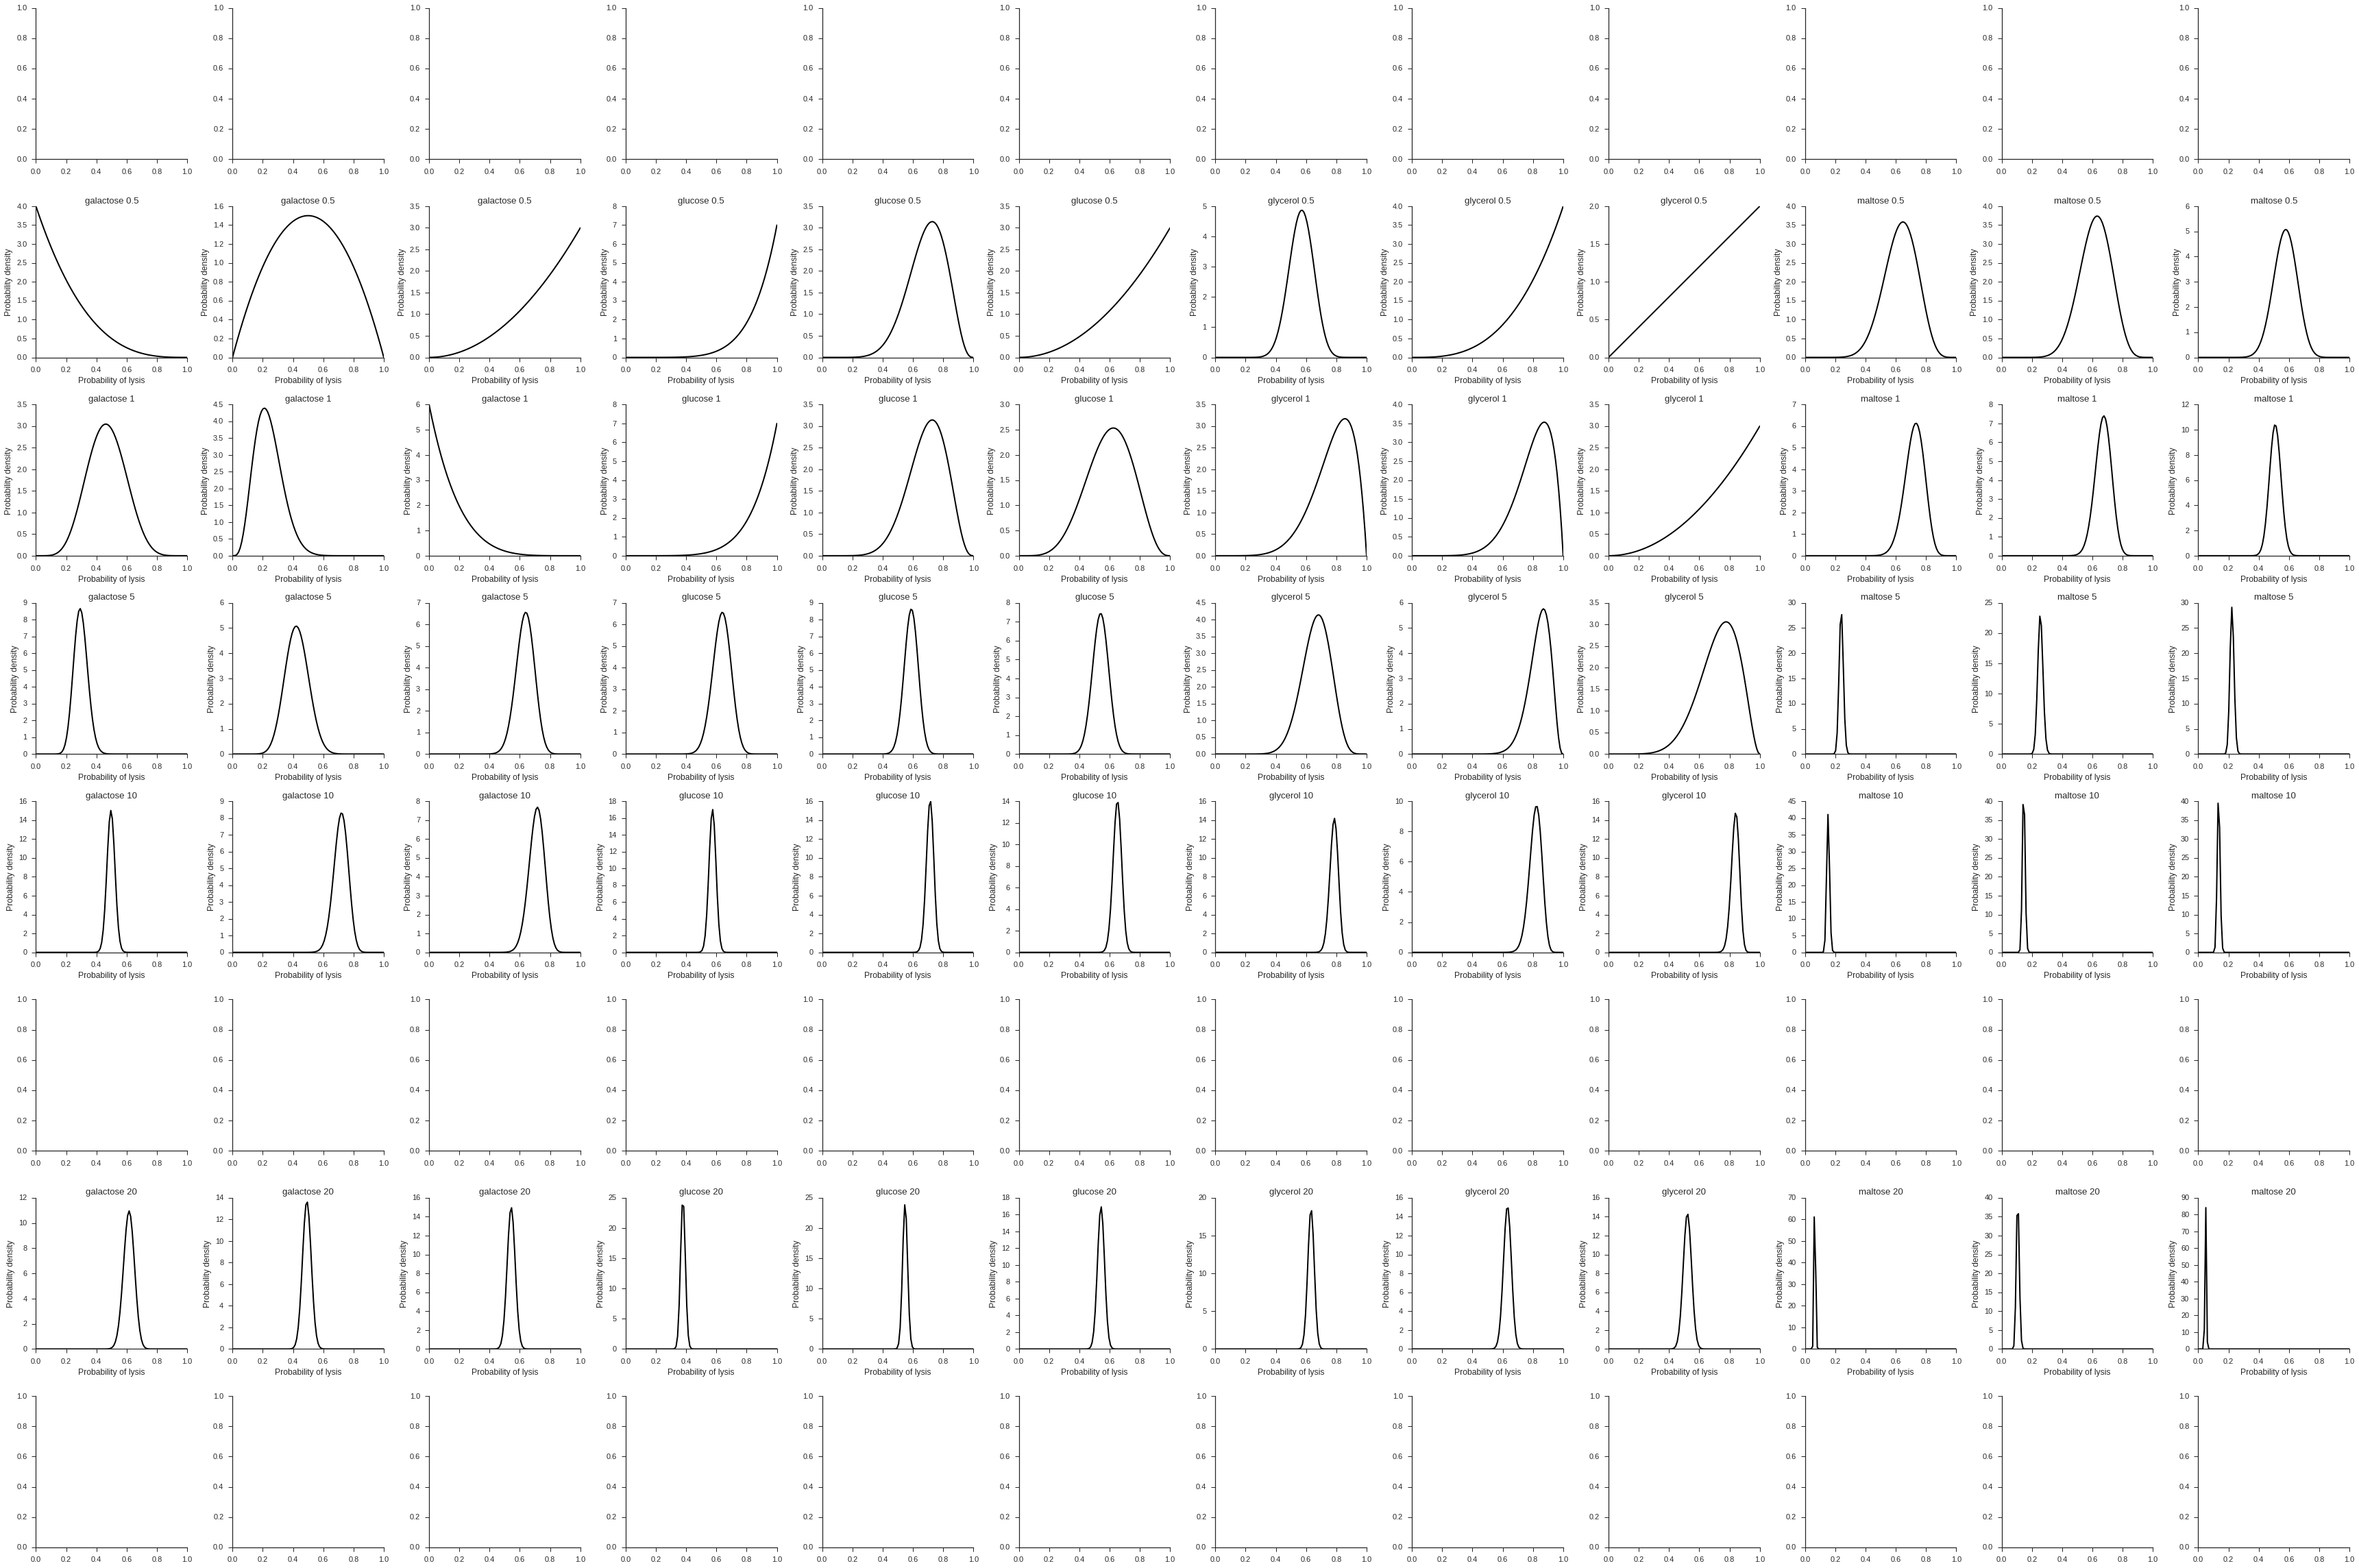

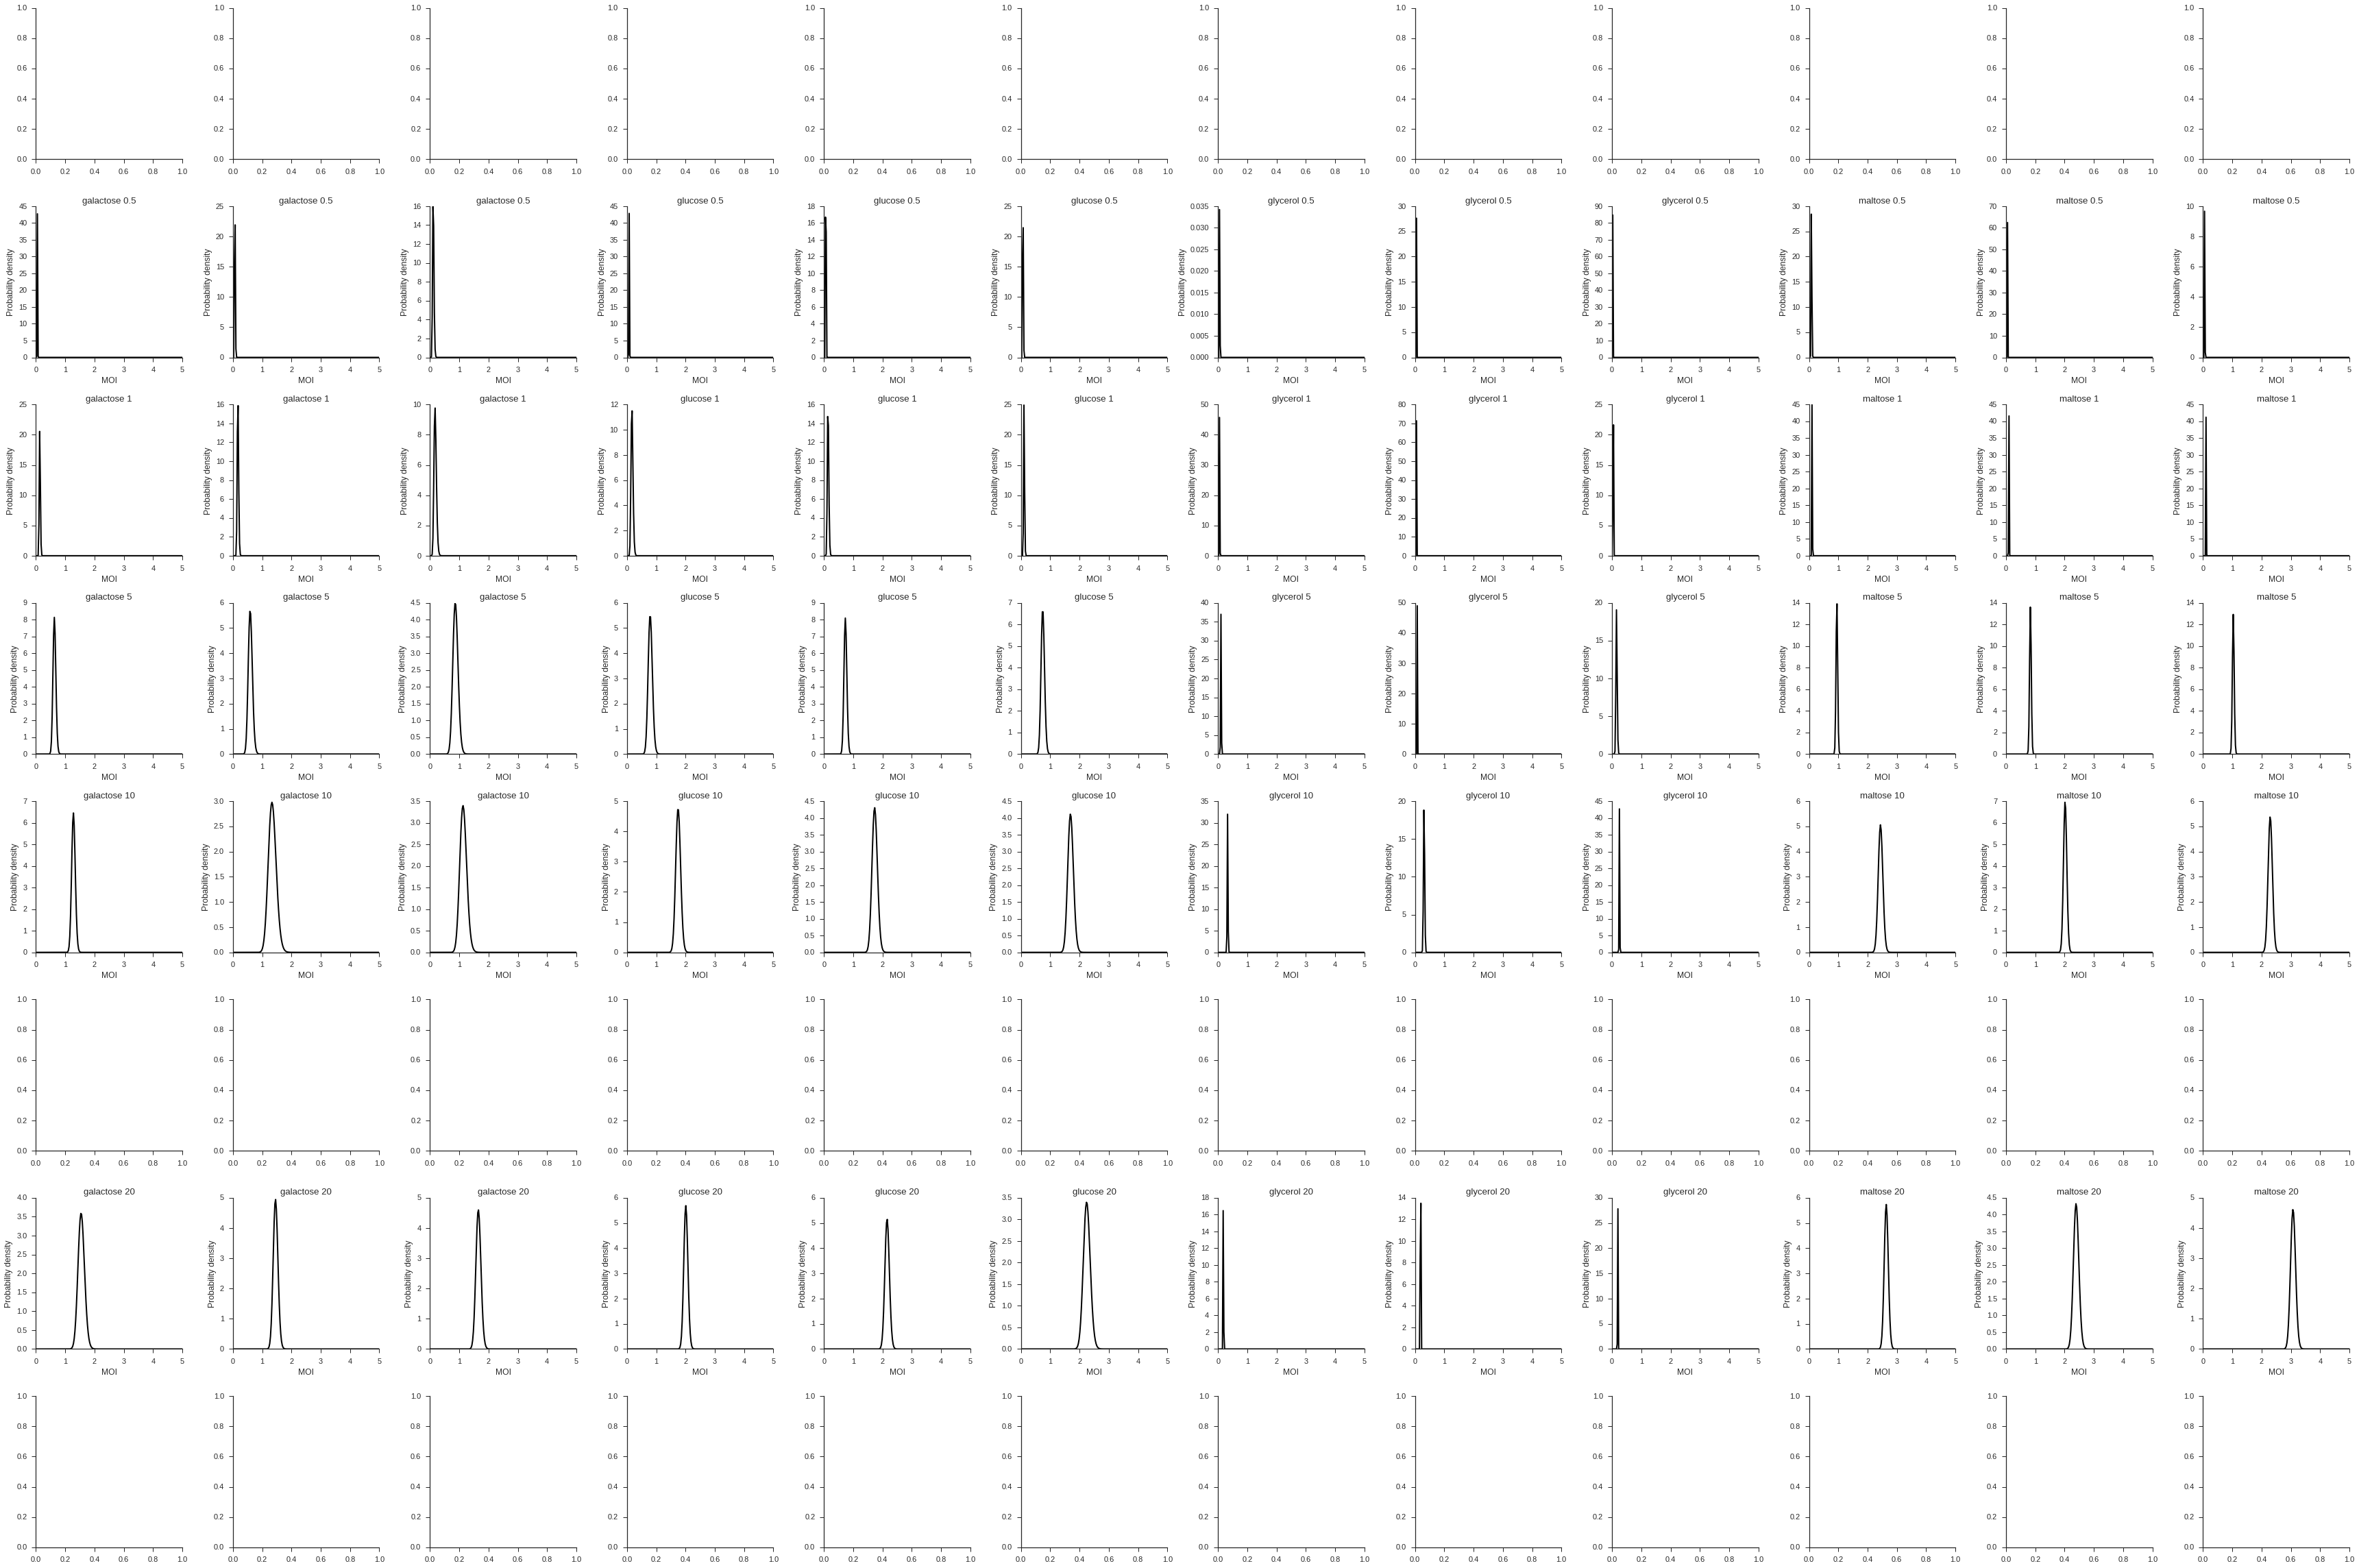

In [6]:
# Fit a gmm to the data

wells = []
titles = []
keio_names_array = get_keio_names()

for row in row_data:
    for col in col_data:
        well = row + str(col)
        wells += [well]
        titles += [reverse_carbon_source[col] + ' ' + str(reverse_phage_added[row])]
lytic_dict, lysogenic_dict, uninfected_dict = classify_infections_gmm(mean_FITC, mean_cherry, wells = wells)

plot_slip_wells_gmm(mean_FITC, mean_cherry, wells = wells, titles = titles, plate_number = 'carbon')
plot_slip_wells_lysis_posterior(mean_FITC, mean_cherry, wells = wells, titles = titles, plate_number = 'carbon')
plot_slip_wells_MOI_posterior(mean_FITC, mean_cherry, wells = wells, titles = titles, plate_number = 'carbon')


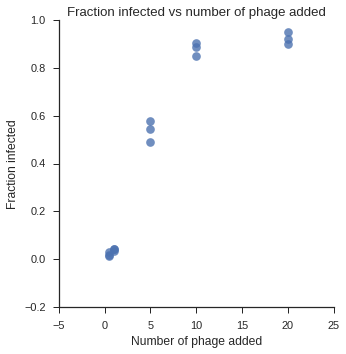

In [7]:
#Compute the fraction infected in each well and plot
conc_list = []
fraction_infected_list = []
for well in ['B10', 'B11', 'B12', 'C10', 'C11', 'C12', 'D10', 'D11', 'D12','E10', 'E11', 'E12','G10', 'G11', 'G12']: 
    fraction_infected = np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0])/np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0] + uninfected_dict[well].shape[0])
    conc_list += [reverse_phage_added[well[0]]]
    fraction_infected_list += [fraction_infected]

d = {'Number of phage added': conc_list, 'Fraction infected': fraction_infected_list}
dataframe = pd.DataFrame(data = d)
grid = sns.lmplot('Number of phage added', 'Fraction infected', dataframe, fit_reg = False, scatter_kws={"s": 75})
ax = grid.axes[0][0]
ax.set_title('Fraction infected vs number of phage added')
#ax.set_xscale('log')




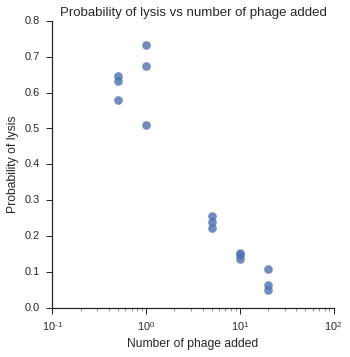

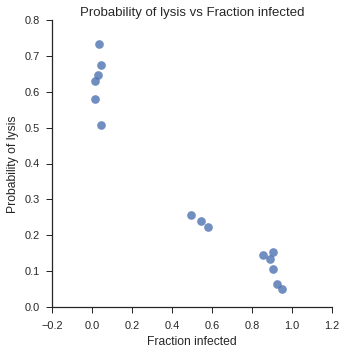

In [8]:
# Plot the probability of lysis as a function of the amount of phage added and the fraction of cells that are infected
carbon = 'maltose'

phage_conc = []
frac_infected = []
p_ly = []
for row in row_data:
    for col in carbon_source[carbon]:
        well = row + str(col)
        fraction_infected = np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0])/np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0] + uninfected_dict[well].shape[0])
        p_lysis = np.float(lytic_dict[well].shape[0])/np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0])

        if lytic_dict[well].shape[0] > 0:
            frac_infected += [fraction_infected]
            phage_conc += [reverse_phage_added[well[0]]]
            p_ly += [p_lysis]

d = {'Number of phage added': phage_conc, 'Fraction infected':frac_infected, 'Probability of lysis': p_ly}
dataframe = pd.DataFrame(data = d)
grid = sns.lmplot('Number of phage added', 'Probability of lysis', dataframe, fit_reg = False, scatter_kws={"s": 75})
ax = grid.axes[0][0]
ax.set_title('Probability of lysis vs number of phage added')
ax.set_xscale('log')

grid = sns.lmplot('Fraction infected', 'Probability of lysis', dataframe, fit_reg = False, scatter_kws={"s": 75})
ax = grid.axes[0][0]
ax.set_title('Probability of lysis vs Fraction infected')


/media/vanvalen/693d2597-3dbf-41bb-b919-341f714e3199/keio_screen/08.14.2017/titer


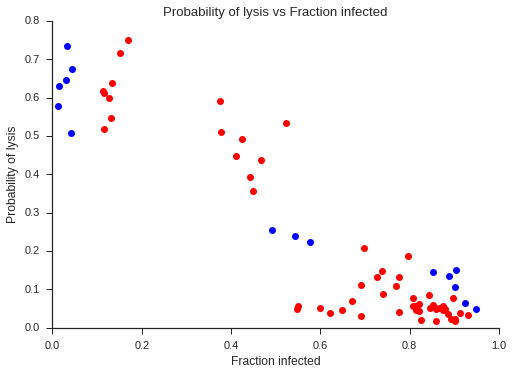

In [14]:
# Load data from the 08.14.2017 MOI titration experiment
direc = "/media/vanvalen/693d2597-3dbf-41bb-b919-341f714e3199/keio_screen/08.14.2017/"
data_08152017 = [os.path.join(direc, 'titer')]
data = data_08152017

for root_direc in data:
    plate_number = 0
    print root_direc
    #Define directory path to infection data (all positions)
    data_direc = os.path.join(root_direc, 'data')

    #Define directory path to control data (all positions)
    control_direc = os.path.join(root_direc, 'control')

    #Define directory path to where you want to store neural net outputs. 
    #mask directories must exist at run time!
    mask_direc = os.path.join(root_direc, 'masks')
    control_mask_direc = os.path.join(root_direc,'control_masks')

    #Define which wells were used

    row_data_0815 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
    col_data_0815 = [5, 6, 7, 8, 9, 10, 11, 12]

    mean_FITC_name = os.path.join(root_direc, 'mean_FITC.pkl')
    mean_cherry_name = os.path.join(root_direc, 'mean_cherry.pkl')
    mean_FITC = pickle.load(open(mean_FITC_name, 'rb'))
    mean_cherry = pickle.load(open(mean_cherry_name, 'rb'))

    wells = []
    classification_wells = []
    titles = []
    keio_names_array = get_keio_names()

    for row in row_data_0815:
        for col in col_data_0815:
            well = row + str(col)
            wells += [well]
            titles += [well]

    for row in row_data_0815:
        for col in [11, 12]:
            well = row + str(col)
            classification_wells += [well]
            titles += [well]
    lytic_dict_0815, lysogenic_dict_0815, uninfected_dict_0815 = classify_infections_gmm(mean_FITC, mean_cherry, wells = wells, classification_wells = classification_wells)

    reverse_phage_added_0815 = {}
    reverse_phage_added_0815[12] = 1
    reverse_phage_added_0815[11] = 2
    reverse_phage_added_0815[10] = 5
    reverse_phage_added_0815[9] = 10
    reverse_phage_added_0815[8] = 20
    reverse_phage_added_0815[7] = 50
    reverse_phage_added_0815[6] = 100
    reverse_phage_added_0815[5] = 0
    
carbon = 'maltose'

phage_conc = []
frac_infected = []
p_ly = []
for row in row_data:
    for col in carbon_source[carbon]:
        well = row + str(col)
        fraction_infected = np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0])/np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0] + uninfected_dict[well].shape[0])
        p_lysis = np.float(lytic_dict[well].shape[0])/np.float(lytic_dict[well].shape[0] + lysogenic_dict[well].shape[0])

        if lytic_dict[well].shape[0] > 0:
            frac_infected += [fraction_infected]
            phage_conc += [reverse_phage_added[well[0]]]
            p_ly += [p_lysis]
            
frac_infected_0815 = []
p_ly_0815 = []
for row in row_data_0815:
    for col in [6,7,8,9,10,11,12]:
        well = row + str(col)
        fraction_infected = np.float(lytic_dict_0815[well].shape[0] + lysogenic_dict_0815[well].shape[0])/np.float(lytic_dict_0815[well].shape[0] + lysogenic_dict_0815[well].shape[0] + uninfected_dict_0815[well].shape[0])
        p_lysis = np.float(lytic_dict_0815[well].shape[0])/np.float(lytic_dict_0815[well].shape[0] + lysogenic_dict_0815[well].shape[0])

        frac_infected_0815 += [fraction_infected]
        p_ly_0815 += [p_lysis]
        
fig = plt.figure()
ax = plt.gca()
plt.plot(frac_infected, p_ly, 'o', color = 'b')
plt.plot(frac_infected_0815, p_ly_0815, 'o', color = 'r')
ax.set_title('Probability of lysis vs Fraction infected')
ax.set_xlabel('Fraction infected')
ax.set_ylabel('Probability of lysis')
sns.despine()
            
